In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data\dirty_dataset.csv')

In [3]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,Dealer_C,Product_Z,South,812.0,56.0,normal,high,False,high_demand,4919.0,True
1,Dealer_C,Product_Z,South,73.0,69.0,drop,low,False,steady,1874.0,False
2,Dealer_D,Product_W,South,308.0,98.0,spike,medium,True,steady,9509.0,True
3,Dealer_D,Product_W,Central,496.0,4.0,spike,low,False,steady,8224.0,True
4,Dealer_B,Product_X,Central,227.0,90.0,normal,low,False,steady,3740.0,True


In [4]:
df.shape

(1050, 11)

In [5]:
df.isna().sum()

Dealer                  52
Product                 52
Region                   0
Inventory_Level         52
Consumption_Pattern     52
Stock_Movement           0
Risk_Level               0
Stockout_Risk            0
Seasonality              0
Forecast_Requirement    52
Alert                    0
dtype: int64

In [6]:
df = pd.DataFrame(df)

In [7]:
## Handling missing values in numerical data
df['Inventory_Level'].fillna(df['Inventory_Level'].mean(), inplace=True)
df['Forecast_Requirement'].fillna(df['Forecast_Requirement'].mean(), inplace=True)
df['Consumption_Pattern'].fillna(df['Consumption_Pattern'].mean(),inplace=True)
df.isna().sum()

Dealer                  52
Product                 52
Region                   0
Inventory_Level          0
Consumption_Pattern      0
Stock_Movement           0
Risk_Level               0
Stockout_Risk            0
Seasonality              0
Forecast_Requirement     0
Alert                    0
dtype: int64

In [8]:
## Handling missing  values in Categorical values (most frequent value)
df['Dealer'].fillna(df['Dealer'].mode()[0],inplace=True)
df['Product'].fillna(df['Product'].mode()[0],inplace=True)
df['Region'].fillna(df['Region'].mode()[0],inplace=True)
df['Stockout_Risk'].fillna(df['Stockout_Risk'].mode()[0],inplace=True)
df['Seasonality'].fillna(df['Seasonality'].mode()[0],inplace=True)
df['Stock_Movement'].fillna(df['Stock_Movement'].mode()[0], inplace=True)
df['Risk_Level'].fillna(df['Risk_Level'].mode()[0], inplace=True)
df['Alert'].fillna(df['Alert'].mode()[0], inplace=True)

df.isna().sum()


Dealer                  0
Product                 0
Region                  0
Inventory_Level         0
Consumption_Pattern     0
Stock_Movement          0
Risk_Level              0
Stockout_Risk           0
Seasonality             0
Forecast_Requirement    0
Alert                   0
dtype: int64

In [9]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,Dealer_C,Product_Z,South,812.0,56.0,normal,high,False,high_demand,4919.0,True
1,Dealer_C,Product_Z,South,73.0,69.0,drop,low,False,steady,1874.0,False
2,Dealer_D,Product_W,South,308.0,98.0,spike,medium,True,steady,9509.0,True
3,Dealer_D,Product_W,Central,496.0,4.0,spike,low,False,steady,8224.0,True
4,Dealer_B,Product_X,Central,227.0,90.0,normal,low,False,steady,3740.0,True


In [10]:
df.duplicated().sum()

46

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dealer                1004 non-null   object 
 1   Product               1004 non-null   object 
 2   Region                1004 non-null   object 
 3   Inventory_Level       1004 non-null   float64
 4   Consumption_Pattern   1004 non-null   float64
 5   Stock_Movement        1004 non-null   object 
 6   Risk_Level            1004 non-null   object 
 7   Stockout_Risk         1004 non-null   bool   
 8   Seasonality           1004 non-null   object 
 9   Forecast_Requirement  1004 non-null   float64
 10  Alert                 1004 non-null   bool   
dtypes: bool(2), float64(3), object(6)
memory usage: 80.4+ KB


In [13]:
df.nunique()

Dealer                    5
Product                   5
Region                    5
Inventory_Level         573
Consumption_Pattern     101
Stock_Movement            3
Risk_Level                3
Stockout_Risk             2
Seasonality               3
Forecast_Requirement    851
Alert                     2
dtype: int64

In [14]:
df.describe()

,Inventory_Level,Consumption_Pattern,Forecast_Requirement
count,1004.000000,1004.000000,1004.000000
mean,519.240305,51.699838,5267.243020
std,291.276642,29.460272,2861.999316
min,10.000000,1.000000,103.000000
25%,293.750000,28.000000,2960.000000
50%,519.665331,51.000000,5289.209920
75%,742.500000,74.000000,7360.250000
max,1345.000000,136.000000,13546.000000


In [15]:
import numpy as np
from scipy import stats

# Select the numerical columns for which we want to handle outliers
numerical_columns = ['Inventory_Level', 'Consumption_Pattern', 'Forecast_Requirement']

# Calculate the Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold for Z-score (typically 3 or above)
threshold = 2

# Identify rows with outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove rows with outliers
df_cleaned = df[~outliers]

# Print the number of rows before and after removing outliers
print("Number of rows before removing outliers:", len(df))
print("Number of rows after removing outliers:", len(df_cleaned))


Number of rows before removing outliers: 1004
Number of rows after removing outliers: 951


In [16]:
df.describe()

,Inventory_Level,Consumption_Pattern,Forecast_Requirement
count,1004.000000,1004.000000,1004.000000
mean,519.240305,51.699838,5267.243020
std,291.276642,29.460272,2861.999316
min,10.000000,1.000000,103.000000
25%,293.750000,28.000000,2960.000000
50%,519.665331,51.000000,5289.209920
75%,742.500000,74.000000,7360.250000
max,1345.000000,136.000000,13546.000000


In [17]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,Dealer_C,Product_Z,South,812.0,56.0,normal,high,False,high_demand,4919.0,True
1,Dealer_C,Product_Z,South,73.0,69.0,drop,low,False,steady,1874.0,False
2,Dealer_D,Product_W,South,308.0,98.0,spike,medium,True,steady,9509.0,True
3,Dealer_D,Product_W,Central,496.0,4.0,spike,low,False,steady,8224.0,True
4,Dealer_B,Product_X,Central,227.0,90.0,normal,low,False,steady,3740.0,True


In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Inventory_Level', 'Consumption_Pattern', 'Stockout_Risk', 'Forecast_Requirement', 'Alert']

We have 6 categorical features : ['Dealer', 'Product', 'Region', 'Stock_Movement', 'Risk_Level', 'Seasonality']


In [19]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,Dealer_C,Product_Z,South,812.0,56.0,normal,high,False,high_demand,4919.0,True
1,Dealer_C,Product_Z,South,73.0,69.0,drop,low,False,steady,1874.0,False
2,Dealer_D,Product_W,South,308.0,98.0,spike,medium,True,steady,9509.0,True
3,Dealer_D,Product_W,Central,496.0,4.0,spike,low,False,steady,8224.0,True
4,Dealer_B,Product_X,Central,227.0,90.0,normal,low,False,steady,3740.0,True


In [20]:
# Convert all float columns to int64
df = df.astype({col: 'int64' for col in df.select_dtypes(include='float64').columns})

# Verify the changes
print(df.dtypes)


Dealer                  object
Product                 object
Region                  object
Inventory_Level          int64
Consumption_Pattern      int64
Stock_Movement          object
Risk_Level              object
Stockout_Risk             bool
Seasonality             object
Forecast_Requirement     int64
Alert                     bool
dtype: object


In [21]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)


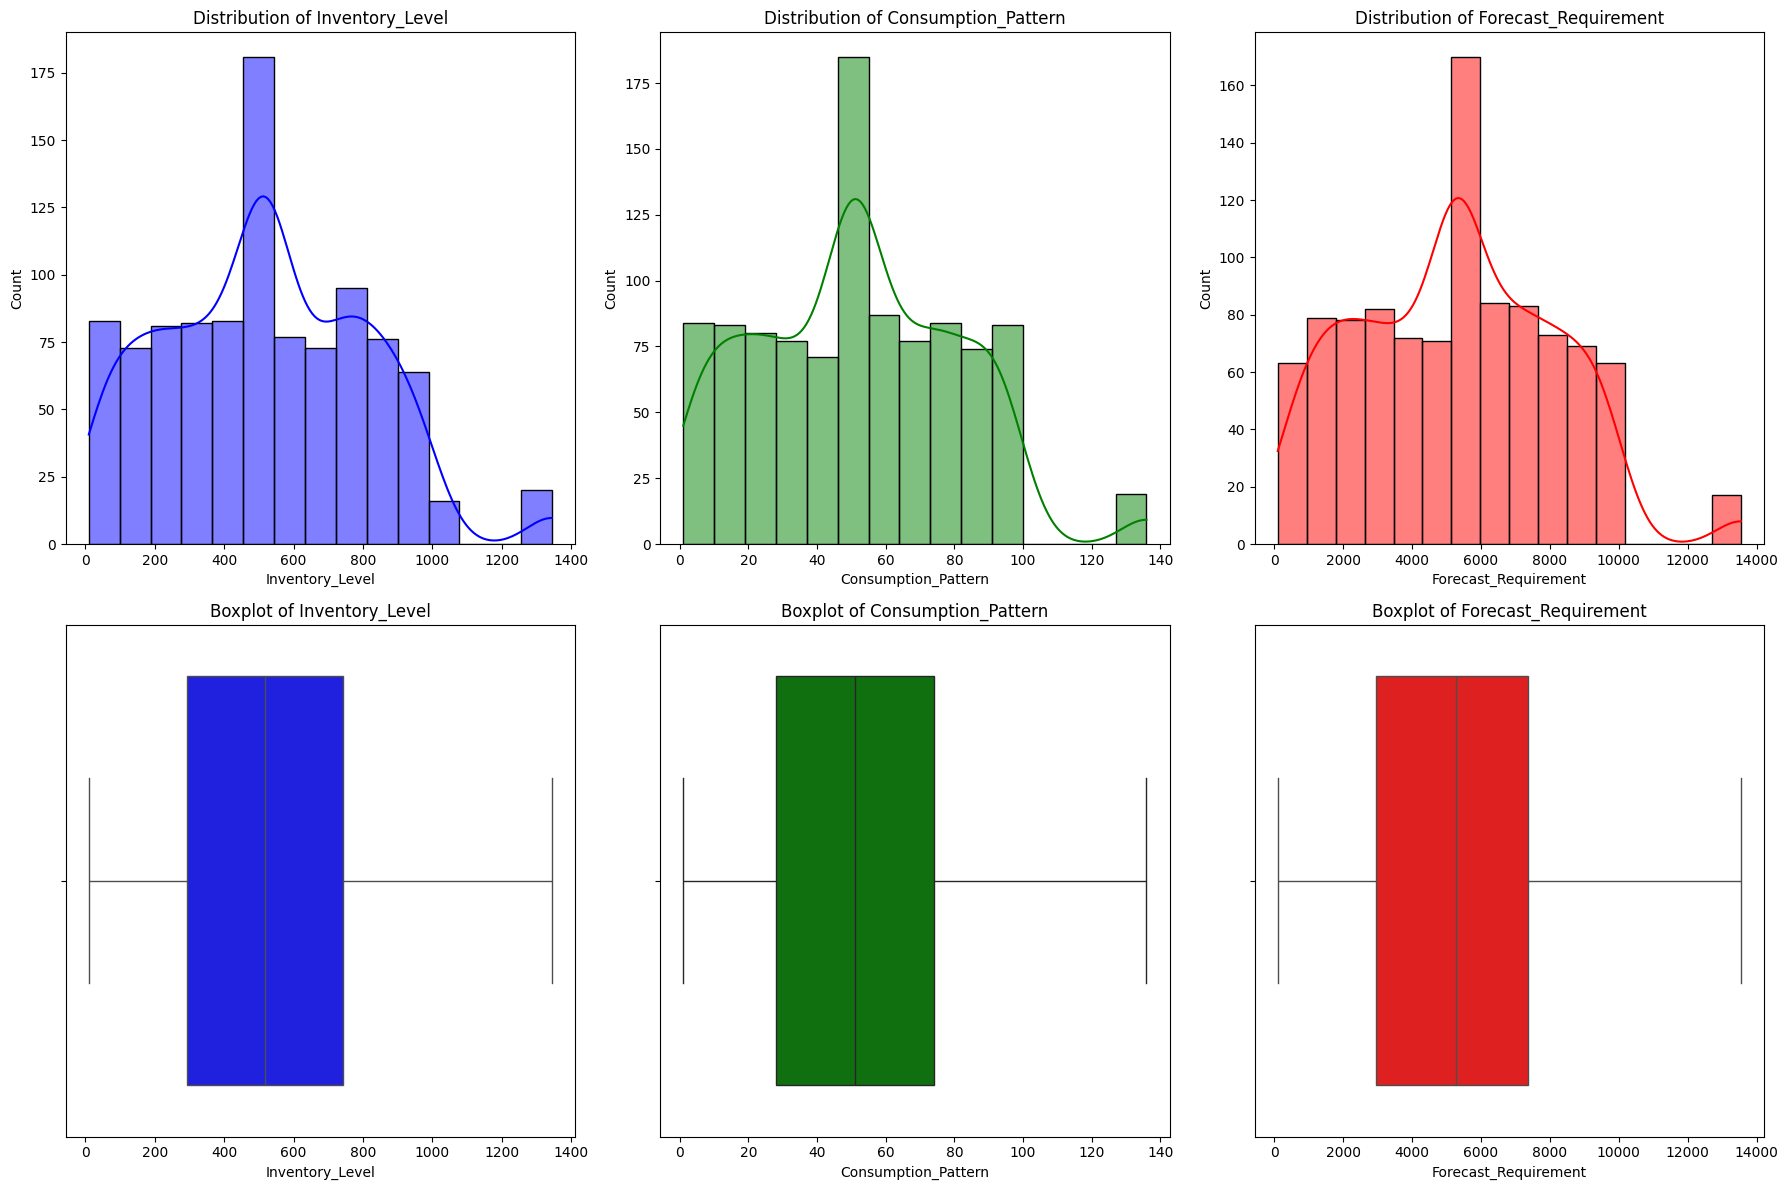

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with outliers
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Inventory_Level'], kde=True, color='blue')
plt.title('Distribution of Inventory_Level')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption_Pattern'], kde=True, color='green')
plt.title('Distribution of Consumption_Pattern')

plt.subplot(2, 3, 3)
sns.histplot(df_eda['Forecast_Requirement'], kde=True, color='red')
plt.title('Distribution of Forecast_Requirement')

# Plot 2: Boxplots to visualize outliers
plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Inventory_Level', color='blue')
plt.title('Boxplot of Inventory_Level')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_eda, x='Consumption_Pattern', color='green')
plt.title('Boxplot of Consumption_Pattern')

plt.subplot(2, 3, 6)
sns.boxplot(data=df_eda, x='Forecast_Requirement', color='red')
plt.title('Boxplot of Forecast_Requirement')

plt.tight_layout()
plt.show()


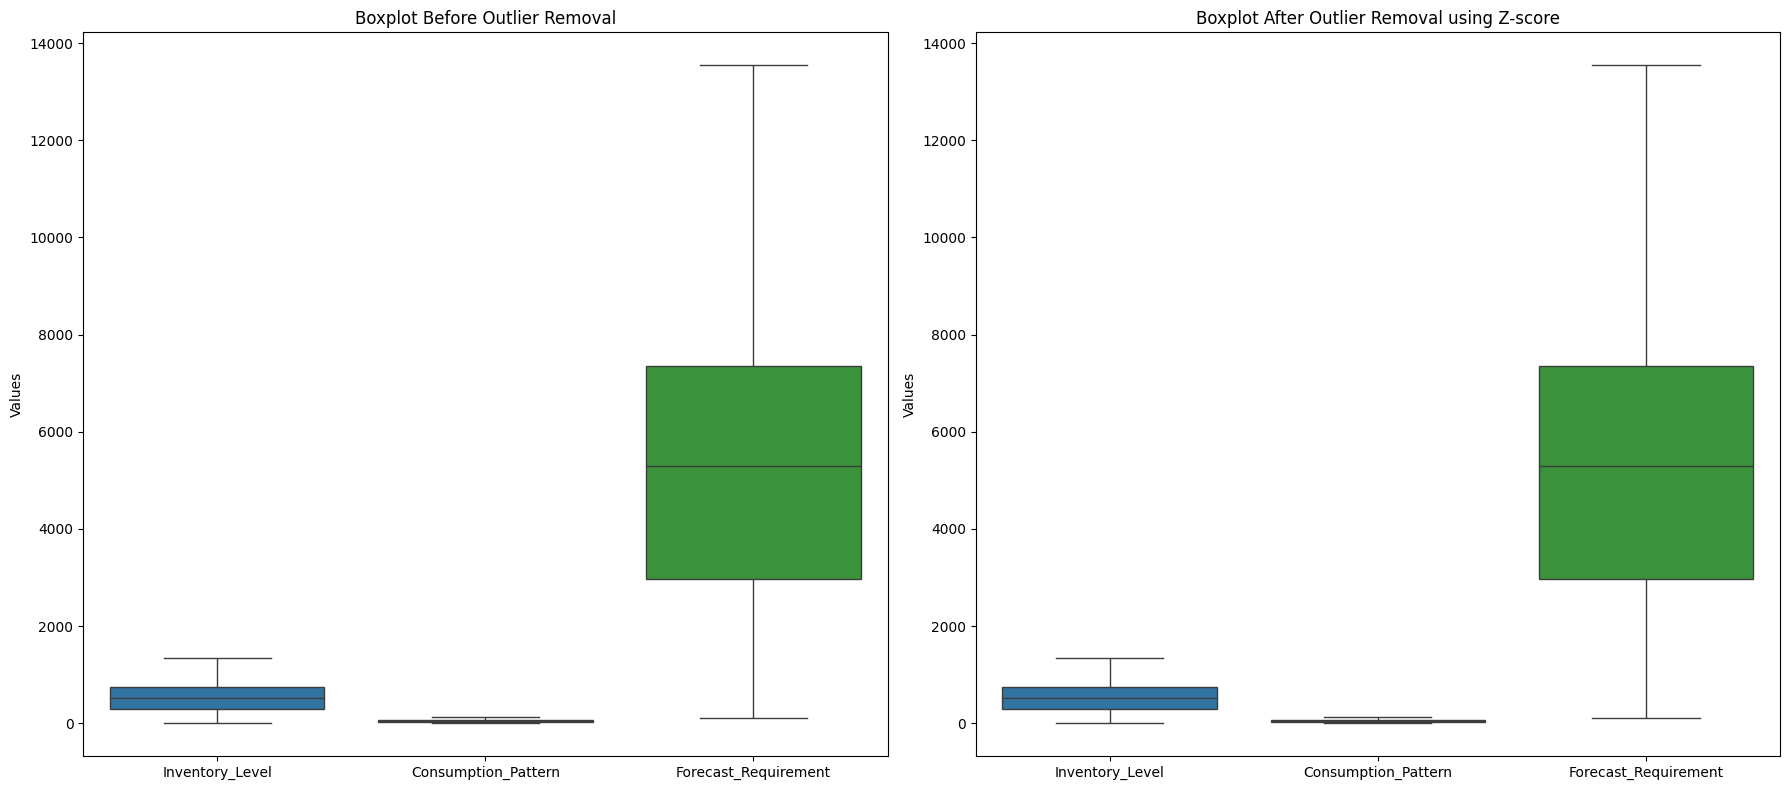

In [23]:
# Create a new figure for combined boxplots before and after handling outliers

# Set up figure size and subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot before handling outliers
sns.boxplot(data=df[['Inventory_Level', 'Consumption_Pattern', 'Forecast_Requirement']], ax=ax[0])
ax[0].set_title('Boxplot Before Outlier Removal')
ax[0].set_ylabel('Values')
ax[0].set_xticklabels(['Inventory_Level', 'Consumption_Pattern', 'Forecast_Requirement'])

# Boxplot after handling outliers using Z-score
sns.boxplot(data=df[['Inventory_Level', 'Consumption_Pattern', 'Forecast_Requirement']], ax=ax[1])
ax[1].set_title('Boxplot After Outlier Removal using Z-score')
ax[1].set_ylabel('Values')
ax[1].set_xticklabels(['Inventory_Level', 'Consumption_Pattern', 'Forecast_Requirement'])

# Show the combined plots
plt.tight_layout()
plt.show()


In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [98]:
df = pd.read_csv('cleaned_dataset.csv')

In [99]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,Dealer_C,Product_Z,South,812,56,normal,high,False,high_demand,4919,True
1,Dealer_C,Product_Z,South,73,69,drop,low,False,steady,1874,False
2,Dealer_D,Product_W,South,308,98,spike,medium,True,steady,9509,True
3,Dealer_D,Product_W,Central,496,4,spike,low,False,steady,8224,True
4,Dealer_B,Product_X,Central,227,90,normal,low,False,steady,3740,True


In [100]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Applying label encoding for columns that make sense for label encoding
df['Dealer'] = label_encoder.fit_transform(df['Dealer'])
df['Product'] = label_encoder.fit_transform(df['Product'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Stock_Movement'] = label_encoder.fit_transform(df['Stock_Movement'])
df['Risk_Level'] = label_encoder.fit_transform(df['Risk_Level'])
df['Stockout_Risk'] = label_encoder.fit_transform(df['Stockout_Risk'])
df['Seasonality'] = label_encoder.fit_transform(df['Seasonality'])
df['Alert'] = label_encoder.fit_transform(df['Alert'])


In [63]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,2,4,3,812,56,1,0,0,0,4919,1
1,2,4,3,73,69,0,1,0,2,1874,0
2,3,1,3,308,98,2,2,1,2,9509,1
3,3,1,0,496,4,2,1,0,2,8224,1
4,1,2,0,227,90,1,1,0,2,3740,1


In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Converting each column to a 2D array before applying fit_transform
df['Inventory_Level'] = scaler.fit_transform(df[['Inventory_Level']])  # Use double brackets to pass as DataFrame
df['Consumption_Pattern'] = scaler.fit_transform(df[['Consumption_Pattern']])
df['Forecast_Requirement'] = scaler.fit_transform(df[['Forecast_Requirement']])

print(df)



      Dealer  Product  Region  Inventory_Level  Consumption_Pattern  \
0          2        4       3         0.600749             0.407407   
1          2        4       3         0.047191             0.503704   
2          3        1       3         0.223221             0.718519   
3          3        1       0         0.364045             0.022222   
4          1        2       0         0.162547             0.659259   
...      ...      ...     ...              ...                  ...   
999        2        0       3         0.008240             0.385185   
1000       0        0       2         0.382022             0.540741   
1001       0        4       0         0.257678             0.237037   
1002       0        1       2         0.637453             0.022222   
1003       2        4       0         0.295880             0.007407   

      Stock_Movement  Risk_Level  Stockout_Risk  Seasonality  \
0                  1           0              0            0   
1                  

In [68]:
df.head()

,Dealer,Product,Region,Inventory_Level,Consumption_Pattern,Stock_Movement,Risk_Level,Stockout_Risk,Seasonality,Forecast_Requirement,Alert
0,2,4,3,0.600749,0.407407,1,0,0,0,0.358253,1
1,2,4,3,0.047191,0.503704,0,1,0,2,0.131741,0
2,3,1,3,0.223221,0.718519,2,2,1,2,0.699695,1
3,3,1,0,0.364045,0.022222,2,1,0,2,0.604106,1
4,1,2,0,0.162547,0.659259,1,1,0,2,0.270550,1


In [102]:
X = df.drop('Forecast_Requirement',axis=1)
y=df['Forecast_Requirement']

In [71]:
print(X)

      Dealer  Product  Region  Inventory_Level  Consumption_Pattern  \
0          2        4       3         0.600749             0.407407   
1          2        4       3         0.047191             0.503704   
2          3        1       3         0.223221             0.718519   
3          3        1       0         0.364045             0.022222   
4          1        2       0         0.162547             0.659259   
...      ...      ...     ...              ...                  ...   
999        2        0       3         0.008240             0.385185   
1000       0        0       2         0.382022             0.540741   
1001       0        4       0         0.257678             0.237037   
1002       0        1       2         0.637453             0.022222   
1003       2        4       0         0.295880             0.007407   

      Stock_Movement  Risk_Level  Stockout_Risk  Seasonality  Alert  
0                  1           0              0            0      1  
1      

In [103]:
print(y)

0       0.358253
1       0.131741
2       0.699695
3       0.604106
4       0.270550
          ...   
999     0.154579
1000    0.339805
1001    0.400060
1002    0.131667
1003    0.043443
Name: Forecast_Requirement, Length: 1004, dtype: float64


In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model





In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test are the true values and y_pred are the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.160864183247887
Mean Squared Error (MSE): 0.041836227222618816
Root Mean Squared Error (RMSE): 0.2045390603836314
R-squared (R2): -0.03778903125810862


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor:\n MAE: {mae_rf}\n MSE: {mse_rf}\n RMSE: {rmse_rf}\n R-squared: {r2_rf}")


Random Forest Regressor:
 MAE: 0.1659639317360975
 MSE: 0.04368702879474425
 RMSE: 0.20901442245630864
 R-squared: -0.08369999642153969


In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_reg = GradientBoostingRegressor(random_state=42)

# Train the model
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_reg.predict(X_test)

# Evaluate performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor:\n MAE: {mae_gb}\n MSE: {mse_gb}\n RMSE: {rmse_gb}\n R-squared: {r2_gb}")


Gradient Boosting Regressor:
 MAE: 0.16168203840324522
 MSE: 0.042255070419066586
 RMSE: 0.20556038144318226
 R-squared: -0.048178851372088216


In [79]:
import xgboost as xgb

# Initialize the model
xgb_reg = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor:\n MAE: {mae_xgb}\n MSE: {mse_xgb}\n RMSE: {rmse_xgb}\n R-squared: {r2_xgb}")


XGBoost Regressor:
 MAE: 0.18025424756216182
 MSE: 0.05266498895969714
 RMSE: 0.22948853775231812
 R-squared: -0.3064071858791726


In [89]:
##hypertuning randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForestRegressor model
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=5, scoring='neg_mean_squared_error', 
                              verbose=1, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest Model Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest CV Score (MSE): {grid_search_rf.best_score_}")

# Cross-validation to check for overfitting or underfitting
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores_rf.mean()}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Model Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest CV Score (MSE): -0.04879686692870942
Cross-validation MSE: 0.04914521883302281


In [91]:
# Use the best Gradient Boosting model to predict on the test set
best_gbr = best_rf_model
y_pred_gbr = best_gbr.predict(X_test)

# Calculate the performance metrics
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, y_pred_gbr)

# Display the results
print(f"Random forest regressor Test Set Performance:")
print(f"Mean Absolute Error (MAE): {gbr_mae}")
print(f"Mean Squared Error (MSE): {gbr_mse}")
print(f"Root Mean Squared Error (RMSE): {gbr_rmse}")
print(f"R-squared (R2): {gbr_r2}")

Random forest regressor Test Set Performance:
Mean Absolute Error (MAE): 0.16450597721232452
Mean Squared Error (MSE): 0.04223471255782989
Root Mean Squared Error (RMSE): 0.20551085751811238
R-squared (R2): -0.047673854471222965


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgbr = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid_xgbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Setup the grid search
grid_search_xgbr = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgbr, 
                                scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search_xgbr.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best XGBoost Model Parameters: {grid_search_xgbr.best_params_}")
print(f"Best XGBoost CV Score (MSE): {grid_search_xgbr.best_score_}")


In [ ]:
# Use the best XGBoost model to predict on the test set
best_xgboost = grid_search_xgbr.best_estimator_
y_pred_xgb = best_xgboost.predict(X_test)

# Calculate the performance metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Display the results
print(f"XGBoost Regressor Test Set Performance:")
print(f"Mean Absolute Error (MAE): {xgb_mae}")
print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"R-squared (R2): {xgb_r2}")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Setup the grid search
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, 
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search_gbr.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Gradient Boosting Model Parameters: {grid_search_gbr.best_params_}")
print(f"Best Gradient Boosting CV Score (MSE): {grid_search_gbr.best_score_}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [ ]:
# Use the best Gradient Boosting model to predict on the test set
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

# Calculate the performance metrics
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, y_pred_gbr)

# Display the results
print(f"Gradient Boosting Regressor Test Set Performance:")
print(f"Mean Absolute Error (MAE): {gbr_mae}")
print(f"Mean Squared Error (MSE): {gbr_mse}")
print(f"Root Mean Squared Error (RMSE): {gbr_rmse}")
print(f"R-squared (R2): {gbr_r2}")


Gradient Boosting Regressor Test Set Performance:
Mean Absolute Error (MAE): 0.15839990797123238
Mean Squared Error (MSE): 0.041048075201466756
Root Mean Squared Error (RMSE): 0.20260324578216105
R-squared (R2): -0.018238140156884075


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load the trained model (e.g., Gradient Boosting Regressor)
gb_model = joblib.load('best_random_forest_model.pkl')

# Load the new test data from a CSV file
new_test_data = pd.read_csv('imstesting.csv')

# Preprocessing: Label Encoding for categorical columns
label_encoder = LabelEncoder()

new_test_data['Dealer'] = label_encoder.fit_transform(new_test_data['Dealer'])
new_test_data['Product'] = label_encoder.fit_transform(new_test_data['Product'])
new_test_data['Region'] = label_encoder.fit_transform(new_test_data['Region'])
new_test_data['Stock_Movement'] = label_encoder.fit_transform(new_test_data['Stock_Movement'])
new_test_data['Risk_Level'] = label_encoder.fit_transform(new_test_data['Risk_Level'])
new_test_data['Stockout_Risk'] = label_encoder.fit_transform(new_test_data['Stockout_Risk'])
new_test_data['Seasonality'] = label_encoder.fit_transform(new_test_data['Seasonality'])
new_test_data['Alert'] = label_encoder.fit_transform(new_test_data['Alert'])

# Preprocessing: Scaling numerical columns
scaler = MinMaxScaler()

new_test_data['Inventory_Level'] = scaler.fit_transform(new_test_data[['Inventory_Level']])
new_test_data['Consumption_Pattern'] = scaler.fit_transform(new_test_data[['Consumption_Pattern']])

# Selecting the feature columns for prediction (assuming these are the same as in training)
X_new = new_test_data[[
    'Dealer', 'Product', 'Region','Inventory_Level','Consumption_Pattern','Stock_Movement','Risk_Level', 'Stockout_Risk', 
    'Seasonality', 'Alert', 
]]

# Predict using the loaded model
predictions = gb_model.predict(X_new)

# Add predictions to the dataframe
new_test_data['Predictions'] = predictions

# Save the predictions to a new CSV file
new_test_data.to_csv('predictions_output.csv', index=False)

# Print the prediction result
print("Predictions saved to 'predictions_output.csv'")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Alert
- Dealer
- Product
- Region
- Risk_Level
- ...
Feature names seen at fit time, yet now missing:
- Dealer_Dealer_B
- Dealer_Dealer_C
- Dealer_Dealer_D
- Dealer_Dealer_E
- Forecast_Requirement
- ...


XGBoost Regressor Test Set Performance:
Mean Absolute Error (MAE): 0.1583871908047942
Mean Squared Error (MSE): 0.04120015393550978
Root Mean Squared Error (RMSE): 0.20297821049440204
R-squared (R2): -0.0220106037023573


In [59]:
# Display the columns in df_encoded and df_encoded_reduced to verify presence of 'Stockout_Risk'
df_encoded_columns = df_encoded.columns
df_encoded_reduced_columns = df_encoded_reduced.columns

df_encoded_columns, df_encoded_reduced_columns


(Index(['Inventory_Level', 'Consumption_Pattern', 'Stockout_Risk',
        'Forecast_Requirement', 'Alert', 'Dealer_Dealer_B', 'Dealer_Dealer_C',
        'Dealer_Dealer_D', 'Dealer_Dealer_E', 'Product_Product_W',
        'Product_Product_X', 'Product_Product_Y', 'Product_Product_Z',
        'Region_East', 'Region_North', 'Region_South', 'Region_West',
        'Stock_Movement_normal', 'Stock_Movement_spike', 'Risk_Level_low',
        'Risk_Level_medium', 'Seasonality_low_demand', 'Seasonality_steady'],
       dtype='object'),
 Index(['Inventory_Level', 'Consumption_Pattern', 'Stockout_Risk',
        'Forecast_Requirement', 'Alert', 'Dealer_Dealer_B', 'Dealer_Dealer_C',
        'Dealer_Dealer_D', 'Dealer_Dealer_E', 'Product_Product_W',
        'Product_Product_X', 'Product_Product_Y', 'Product_Product_Z',
        'Region_East', 'Region_North', 'Region_South', 'Region_West',
        'Stock_Movement_normal', 'Stock_Movement_spike', 'Risk_Level_low',
        'Seasonality_low_demand'],
     

In [60]:
# Convert 'Stockout_Risk' to integer for proper handling in numerical calculations
df_encoded_reduced['Stockout_Risk'] = df_encoded_reduced['Stockout_Risk'].astype(int)

# Recalculate IQR and check for outliers
Q1 = df_encoded_reduced[numerical_columns].quantile(0.25)
Q3 = df_encoded_reduced[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_encoded_reduced[numerical_columns] < (Q1 - 1.5 * IQR)) | 
            (df_encoded_reduced[numerical_columns] > (Q3 + 1.5 * IQR)))

# Summarize the number of outliers per feature
outliers_sum = outliers.sum()
outliers_sum


Inventory_Level         0
Consumption_Pattern     0
Stockout_Risk           0
Forecast_Requirement    0
dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_encoded_reduced[numerical_columns] = scaler.fit_transform(df_encoded_reduced[numerical_columns])

# Display the first few rows of the scaled dataset
df_encoded_reduced.head()


,Inventory_Level,Consumption_Pattern,Stockout_Risk,Forecast_Requirement,Alert,Dealer_Dealer_B,Dealer_Dealer_C,Dealer_Dealer_D,Dealer_Dealer_E,Product_Product_W,...,Product_Product_Y,Product_Product_Z,Region_East,Region_North,Region_South,Region_West,Stock_Movement_normal,Stock_Movement_spike,Risk_Level_low,Seasonality_low_demand
0,1.005706,0.147512,-0.919559,-0.121732,True,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
1,-1.532665,0.588999,-0.919559,-1.186203,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-0.725470,1.573854,1.087478,1.482842,True,False,False,True,False,True,...,False,False,False,False,True,False,False,True,False,False
3,-0.079714,-1.618435,-0.919559,1.033631,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,True,False
4,-1.003695,1.302170,-0.919559,-0.533887,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.5323383084577115,
 '              precision    recall  f1-score   support\n\n           0       0.51      0.43      0.47        95\n           1       0.55      0.62      0.58       106\n\n    accuracy                           0.53       201\n   macro avg       0.53      0.53      0.52       201\nweighted avg       0.53      0.53      0.53       201\n')

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf


(0.5920398009950248,
 '              precision    recall  f1-score   support\n\n           0       0.57      0.57      0.57        95\n           1       0.61      0.61      0.61       106\n\n    accuracy                           0.59       201\n   macro avg       0.59      0.59      0.59       201\nweighted avg       0.59      0.59      0.59       201\n')

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the best parameters
grid_search_rf.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Make predictions with the tuned model
y_pred_best_rf = grid_search_rf.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

# best_params_rf, accuracy_best_rf, classification_rep_best_rf
print("Accuracy after tuning:", best_params_rf)
print("Accuracy after tuning:", accuracy_best_rf)
print("Classification Report:\n", classification_rep_best_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy after tuning: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after tuning: 0.5920398009950248
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.53        95
           1       0.60      0.69      0.64       106

    accuracy                           0.59       201
   macro avg       0.59      0.59      0.58       201
weighted avg       0.59      0.59      0.59       201



In [54]:
import joblib
# Save the best model to a file
joblib.dump(grid_search_rf.best_estimator_, 'best_random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [56]:
import streamlit as st
import pandas as pd
import joblib

# Load the saved model
best_rf_model = joblib.load('best_random_forest_model.pkl')

# Title of the Streamlit app
st.title("Random Forest Classifier - CSV Prediction Interface")

# Allow user to upload a CSV file
uploaded_file = st.file_uploader("Upload a CSV file", type=["csv"])

if uploaded_file is not None:
    # Read the uploaded CSV file
    input_data = pd.read_csv(uploaded_file)
    
    # Display the uploaded data
    st.write("Uploaded Data:")
    st.dataframe(input_data)

    # Check if 'Predict' button is clicked
    if st.button('Predict'):
        # Ensure the input data is properly formatted (optional: adjust columns as needed)
        # Assuming the CSV has the same feature columns as the training data
        predictions = best_rf_model.predict(input_data)
        
        # Display predictions
        st.write("Predictions:")
        st.write(predictions)
        
        # Option to download predictions
        output = pd.DataFrame(predictions, columns=['Predictions'])
        csv = output.to_csv(index=False).encode('utf-8')
        
        st.download_button(
            label="Download Predictions as CSV",
            data=csv,
            file_name='predictions.csv',
            mime='text/csv',
        )


2025-02-15 15:32:14.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 15:32:14.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
